# ダウ指数 週足 移動メディアン

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

code = 'DJI'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-27 00:00:00-05:00,32906.160156,33405.820312,32500.710938,33390.968750,1457730000,0.0,0.0
2023-03-06 00:00:00-05:00,33425.320312,33572.218750,31783.410156,31909.640625,1584990000,0.0,0.0
2023-03-13 00:00:00-04:00,31819.929688,32306.589844,31429.820312,31861.980469,2394800000,0.0,0.0
2023-03-20 00:00:00-04:00,31872.330078,32761.890625,31805.179688,32237.529297,1698890000,0.0,0.0
2023-03-27 00:00:00-04:00,32276.720703,33291.000000,32276.720703,33274.148438,1491350000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,44148.839844,45054.359375,44026.269531,44544.660156,4323060000,0.0,0.0
2025-02-03 00:00:00-05:00,44268.148438,44966.628906,43879.058594,44303.398438,2921050000,0.0,0.0
2025-02-10 00:00:00-05:00,44396.921875,44769.050781,44104.480469,44546.078125,2381040000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-24 00:00:00-05:00,26526.000000,26775.310547,24681.009766,25409.359375,1580970000,0.0,0.0
2020-03-02 00:00:00-05:00,25590.509766,27102.339844,25226.619141,25864.779297,2819020000,0.0,0.0
2020-03-09 00:00:00-04:00,24992.359375,25020.990234,21154.460938,23185.619141,3820590000,0.0,0.0
2020-03-16 00:00:00-04:00,20917.529297,21768.279297,18917.460938,19173.980469,4087140000,0.0,0.0
2020-03-23 00:00:00-04:00,19028.359375,22595.060547,18213.650391,21636.779297,3677640000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,44148.839844,45054.359375,44026.269531,44544.660156,4323060000,0.0,0.0
2025-02-03 00:00:00-05:00,44268.148438,44966.628906,43879.058594,44303.398438,2921050000,0.0,0.0
2025-02-10 00:00:00-05:00,44396.921875,44769.050781,44104.480469,44546.078125,2381040000,0.0,0.0


In [3]:
period = 13
r_last = len(df0)
r1 = 0
df0['MM13'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm13 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM13'] = mm13
    r1 += 1

In [4]:
period = 26
r_last = len(df0)
r1 = 0
df0['MM26'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm26 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM26'] = mm26
    r1 += 1

In [5]:
period = 52
r_last = len(df0)
r1 = 0
df0['MM52'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm52 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM52'] = mm52
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MM13,MM26,MM52
Date,,,,,,,,,,
2020-02-24 00:00:00-05:00,26526.000000,26775.310547,24681.009766,25409.359375,1580970000,0.0,0.0,NaN,NaN,NaN
2020-03-02 00:00:00-05:00,25590.509766,27102.339844,25226.619141,25864.779297,2819020000,0.0,0.0,NaN,NaN,NaN
2020-03-09 00:00:00-04:00,24992.359375,25020.990234,21154.460938,23185.619141,3820590000,0.0,0.0,NaN,NaN,NaN
2020-03-16 00:00:00-04:00,20917.529297,21768.279297,18917.460938,19173.980469,4087140000,0.0,0.0,NaN,NaN,NaN
2020-03-23 00:00:00-04:00,19028.359375,22595.060547,18213.650391,21636.779297,3677640000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,44148.839844,45054.359375,44026.269531,44544.660156,4323060000,0.0,0.0,43487.828125,42542.439453,40145.560547
2025-02-03 00:00:00-05:00,44268.148438,44966.628906,43879.058594,44303.398438,2921050000,0.0,0.0,43828.058594,42786.195312,40316.470703
2025-02-10 00:00:00-05:00,44396.921875,44769.050781,44104.480469,44546.078125,2381040000,0.0,0.0,43828.058594,42852.060547,40467.375000


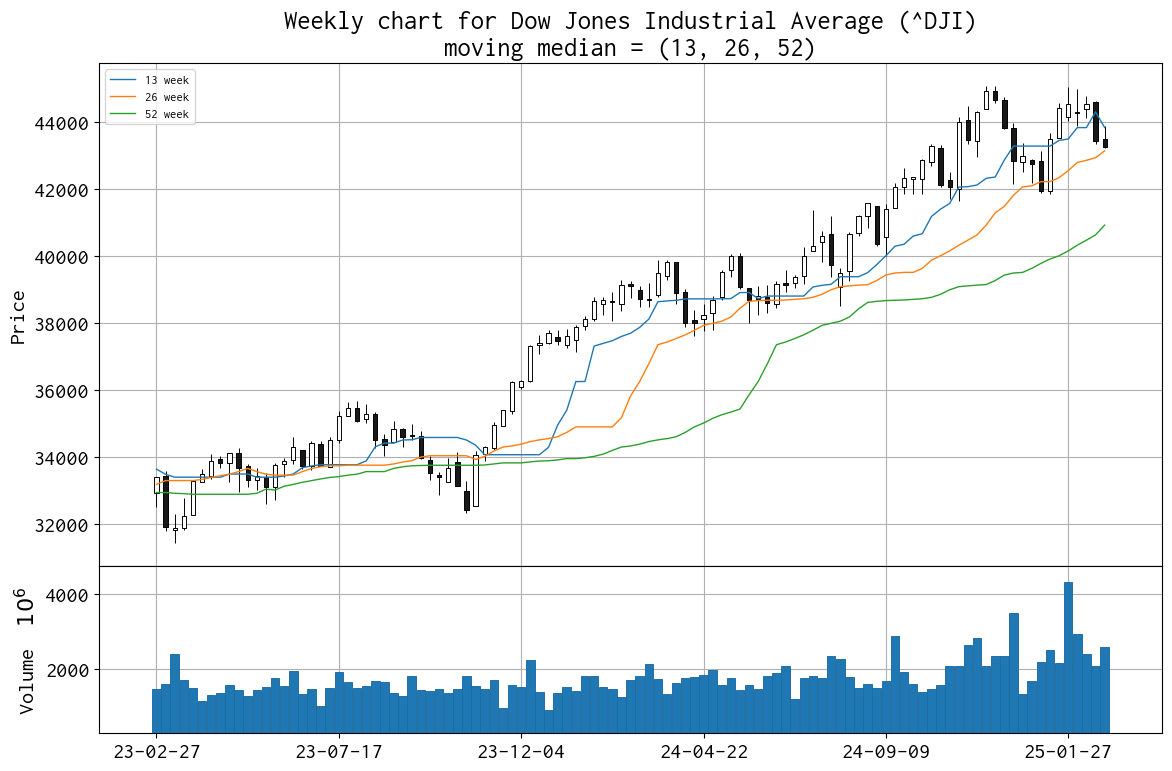

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm13 = df0['MM13']
mm26 = df0['MM26']
mm52 = df0['MM52']
apds  = [
    mpf.make_addplot(mm13[df.index], width=1, label='13 week', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=1, label='26 week', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=1, label='52 week', ax=ax[0]),
]

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_%s.png' % code)
plt.show()

In [7]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-17 00:00:00-05:00,44583.910156,44636.191406,43349.328125,43428.019531,2061720000,0.0,0.0
2025-02-24 00:00:00-05:00,43493.121094,43884.191406,43224.531250,43239.500000,2586705683,0.0,0.0


In [8]:
df.tail(2)['Close']

Date
2025-02-17 00:00:00-05:00    43428.019531
2025-02-24 00:00:00-05:00    43239.500000
Name: Close, dtype: float64

In [9]:
df.tail(2)['Close'].diff()

Date
2025-02-17 00:00:00-05:00           NaN
2025-02-24 00:00:00-05:00   -188.519531
Name: Close, dtype: float64

In [10]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-02-24 00:00:00-05:00   -253.621094
dtype: float64

In [11]:
df['Close'].rolling(13).mean().tail()

Date
2025-01-27 00:00:00-05:00    43697.807993
2025-02-03 00:00:00-05:00    43721.993389
2025-02-10 00:00:00-05:00    43806.692608
2025-02-17 00:00:00-05:00    43739.885517
2025-02-24 00:00:00-05:00    43611.335637
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(26).mean().tail()

Date
2025-01-27 00:00:00-05:00    42682.370042
2025-02-03 00:00:00-05:00    42867.210787
2025-02-10 00:00:00-05:00    43016.684495
2025-02-17 00:00:00-05:00    43103.336088
2025-02-24 00:00:00-05:00    43167.813852
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    40897.894907
2025-02-03 00:00:00-05:00    41006.196965
2025-02-10 00:00:00-05:00    41120.006385
2025-02-17 00:00:00-05:00    41202.631160
2025-02-24 00:00:00-05:00    41282.479642
Name: Close, dtype: float64